# <u>Project Name</u> : Multiclass Fish Image Classification

# <u>Project Holder</u>: Siddhartha Ram Konasani

# Github:

# <u>Project Statement</u>:
The objective of this project is to develop an accurate and efficient deep learning model capable of multi-class classification of fish species based on image data. Given a dataset containing labeled images of various fish types, the goal is to classify each image into its correct species class using Convolutional Neural Networks (CNNs), including both custom architectures and popular pre-trained models through transfer learning.

This project is motivated by the real-world need for automated fish recognition in domains such as marine biology, fisheries management, seafood industry automation, and environmental monitoring. Traditional manual classification is time-consuming and error-prone, especially with similar-looking species. An AI-based solution offers scalability, speed, and consistent accuracy.

The models are evaluated on their performance using validation accuracy and loss. The end goal is to identify the most reliable and deployable architecture for fish species classification, with potential extension to real-time or mobile applications.

## Project summary :
In this project, a multi-class fish species classification system was developed using deep learning. A custom dataset containing labeled images of six fish classes was collected, preprocessed, and augmented to improve model generalization.

Six different convolutional neural network (CNN) architectures were trained and evaluated:

- Custom CNN (built from scratch)

- VGG16 (transfer learning)

- ResNet50 (transfer learning)

- MobileNetV2 (transfer learning)

- InceptionV3 (transfer learning)

- EfficientNetB0 (transfer learning)

All models were trained under similar hyperparameters with appropriate callbacks to monitor validation loss and accuracy. The results were then compared based on their final validation accuracy and validation loss.

| Model          | Final Val Accuracy | Final Val Loss |
| -------------- | ------------------ | -------------- |
| Custom CNN     | 91.3%              | 0.2978         |
| VGG16          | 71%                | 1.4572         |
| ResNet50       | 17%                | 2.18           |
| MobileNetV2    | 96.5%              | 0.1187         |
| InceptionV3    | 95.3%              | 0.1600         |
| EfficientNetB0 | 17%                | 2.31           |


Among these, `MobileNetV2` achieved the highest validation accuracy of 96.5% with a low validation loss of 0.1187, outperforming all other models. `InceptionV3` also performed strongly with 95.3% accuracy, but MobileNetV2 is more efficient for deployment due to its lightweight architecture.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [3]:
# path
train_path = '/content/drive/MyDrive/Multi Fish Image classification/data/train'
valid_path = '/content/drive/MyDrive/Multi Fish Image classification/data/val'
test_path = '/content/drive/MyDrive/Multi Fish Image classification/data/test'

# Image size and batch
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

Data Preprocessing and Augmentation

Train data needs variety (augment), Test data needs clarity (just rescale)
<br>
These tricks helps our model see different versions of the same image — this is called Data Augmentation. It makes the model stronger and better at generalizing.

For test data, we don’t use flips or rotations — we just rescale. Test data should be clean.

In [4]:
# Data generators for train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
valid_generator = test_val_datagen.flow_from_directory(valid_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_generator  = test_val_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=1, class_mode='categorical', shuffle=False)

num_classes = len(train_generator.class_indices)


Found 6228 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3193 images belonging to 11 classes.


# CNN model built from scratch

In [5]:

def build_cnn_model():
    model = Sequential([
        # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),# First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),# Second convolutional layer with 64 filters
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),# Flatten the 2D feature maps into a 1D vector for dense layers
        tf.keras.layers.Dense(128, activation='relu'),# Dense (fully connected) layer with 128 neurons
        tf.keras.layers.Dropout(0.5),# Dropout layer to reduce overfitting by randomly dropping 50% of neurons
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
# Train the CNN model for 10 epochs using training and validation data
history_cnn = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=10)
cnn_model.save("cnn_fish_model.h5") #Saves model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1593s 8s/step - accuracy: 0.2461 - loss: 2.5155 - val_accuracy: 0.5101 - val_loss: 1.3453
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 480ms/step - accuracy: 0.4794 - loss: 1.4426 - val_accuracy: 0.5888 - val_loss: 1.0933
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 469ms/step - accuracy: 0.5599 - loss: 1.2194 - val_accuracy: 0.6951 - val_loss: 0.8898
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 478ms/step - accuracy: 0.6147 - loss: 1.0730 - val_accuracy: 0.7473 - val_loss: 0.7465
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 477ms/step - accuracy: 0.6402 - loss: 0.9900 - val_accuracy: 0.7747 - val_loss: 0.6742
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 469ms/step - accuracy: 0.6599 - loss: 0.9184 - val_accuracy: 0.8123 - val_loss: 0.5560
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.7177 - loss: 0.7718 - val_accuracy: 0.8260 - val_loss: 0.5114
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.7201 - loss: 0.

- This builds a custom CNN from scratch (not using any pre-trained models).

- Includes 2 Conv2D layers → MaxPooling → Dense → Dropout → Softmax.

- Compiles and trains the model for 10 epochs.

- Saves the model as cnn_fish_model.h5.

In [6]:
def build_transfer_model(base_model_class):
  # Load the pre-trained base model (e.g., VGG16, ResNet50, etc.) without the top classification layers
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3)) # Define the expected input image size (e.g., (224, 224, 3))
    base_model.trainable = False  # Freeze the base model to prevent its weights from being updated during training

    model = Sequential([
        base_model, # Pre-trained base model (frozen)
        GlobalAveragePooling2D(), # Reduce feature maps to a single vector per feature map
        Dropout(0.3), # Add dropout to reduce overfitting (30% dropout rate)
        Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
        Dense(num_classes, activation='softmax')# Final output layer with one neuron per class (softmax for multi-class)
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Transfer Learning with 5 pre-trained models:
- VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0

In [7]:
# Dictionary mapping model names to their corresponding Keras model classes
models_dict = {
    "VGG16": VGG16,
    "ResNet50": ResNet50,
    "MobileNetV2": MobileNetV2,
    "InceptionV3": InceptionV3,
    "EfficientNetB0": EfficientNetB0
}

histories = {} # Dictionary to store training history for each model
for name, model_class in models_dict.items():
    print(f"\nTraining {name}...")
    model = build_transfer_model(model_class)
    history = model.fit(train_generator, validation_data=valid_generator, epochs=5) # Train the model on the training data and validate on validation data for 5 epochs
    model.save(f"{name}_fish_model.h5")#Save the trained model to a file
    histories[name] = history# Store the training history, so we can later compare model performance



Training VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 124s 565ms/step - accuracy: 0.1716 - loss: 2.4410 - val_accuracy: 0.3535 - val_loss: 2.0843
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 511ms/step - accuracy: 0.2922 - loss: 2.0643 - val_accuracy: 0.4698 - val_loss: 1.8706
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 508ms/step - accuracy: 0.3929 - loss: 1.8617 - val_accuracy: 0.5962 - val_loss: 1.7135
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 513ms/step - accuracy: 0.4878 - loss: 1.7292 - val_accuracy: 0.6630 - val_loss: 1.5558
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 525ms/step - accuracy: 0.5389 - loss: 1.5948 - val_accuracy: 0.6859 - val_loss: 1.4324



Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 120s 551ms/step - accuracy: 0.1235 - loss: 2.4817 - val_accuracy: 0.1712 - val_loss: 2.2880
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 495ms/step - accuracy: 0.1689 - loss: 2.3144 - val_accuracy: 0.1712 - val_loss: 2.2563
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 483ms/step - accuracy: 0.1791 - loss: 2.2738 - val_accuracy: 0.1749 - val_loss: 2.2344
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 499ms/step - accuracy: 0.1815 - loss: 2.2564 - val_accuracy: 0.1731 - val_loss: 2.2175
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.1937 - loss: 2.2405 - val_accuracy: 0.1786 - val_loss: 2.2023



Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 111s 523ms/step - accuracy: 0.3756 - loss: 1.8960 - val_accuracy: 0.8883 - val_loss: 0.5870
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 477ms/step - accuracy: 0.8357 - loss: 0.6111 - val_accuracy: 0.9405 - val_loss: 0.2809
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.9072 - loss: 0.3489 - val_accuracy: 0.9524 - val_loss: 0.1932
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 462ms/step - accuracy: 0.9387 - loss: 0.2431 - val_accuracy: 0.9625 - val_loss: 0.1441
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 473ms/step - accuracy: 0.9533 - loss: 0.1866 - val_accuracy: 0.9707 - val_loss: 0.1125



Training InceptionV3...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 601ms/step - accuracy: 0.4136 - loss: 1.7434 - val_accuracy: 0.8745 - val_loss: 0.5079
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 495ms/step - accuracy: 0.8263 - loss: 0.5608 - val_accuracy: 0.9093 - val_loss: 0.3140
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.8785 - loss: 0.3964 - val_accuracy: 0.9368 - val_loss: 0.2384
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 487ms/step - accuracy: 0.8940 - loss: 0.3176 - val_accuracy: 0.9496 - val_loss: 0.1829
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.9139 - loss: 0.2696 - val_accuracy: 0.9597 - val_loss: 0.1590



Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 577ms/step - accuracy: 0.1568 - loss: 2.3413 - val_accuracy: 0.1712 - val_loss: 2.3116
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 467ms/step - accuracy: 0.1640 - loss: 2.3133 - val_accuracy: 0.1712 - val_loss: 2.3172
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 478ms/step - accuracy: 0.1713 - loss: 2.3134 - val_accuracy: 0.1712 - val_loss: 2.3107
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 469ms/step - accuracy: 0.1791 - loss: 2.3020 - val_accuracy: 0.1712 - val_loss: 2.3142
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 467ms/step - accuracy: 0.1771 - loss: 2.3044 - val_accuracy: 0.1712 - val_loss: 2.3125


Evaluation using Accuracy, Confusion Matrix, and Classification Report

we will evaluate every model to :

- predict test data

- draw confusion matrix

- show classification report

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 716s 224ms/step
Classification Report for CNN:
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.97      0.97       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.90      0.97      0.93       298
   fish sea_food gilt_head_bream       0.77      0.71      0.74       305
   fish sea_food hourse_mackerel       0.77      0.98      0.86       286
        fish sea_food red_mullet       1.00      0.85      0.91       291
     fish sea_food red_sea_bream       0.81      0.86      0.83       273
          fish sea_food sea_bass       0.72      0.69      0.71       327
            fish sea_food shrimp       0.89      0.99      0.94       295
fish sea_food striped_red_mullet       0.82      0.71      0.76       293
             fish sea_food trout       0.96      0.93      0.94       292

                        accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


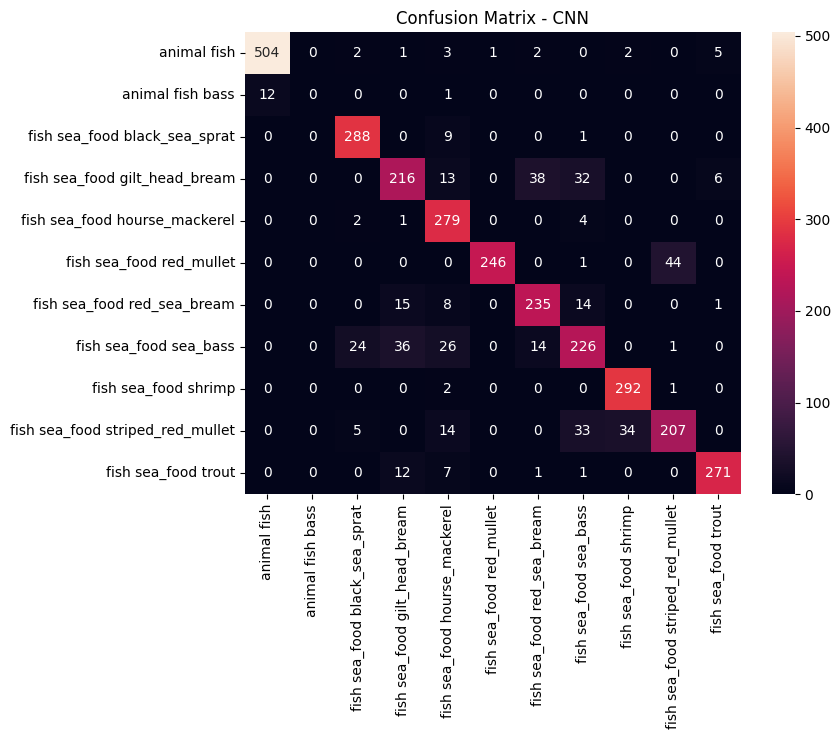

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step
Classification Report for VGG16:
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.98      0.96       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.80      0.78      0.79       298
   fish sea_food gilt_head_bream       0.74      0.34      0.47       305
   fish sea_food hourse_mackerel       0.49      0.88      0.63       286
        fish sea_food red_mullet       0.52      0.53      0.52       291
     fish sea_food red_sea_bream       0.84      0.68      0.75       273
          fish sea_food sea_bass       0.98      0.36      0.53       327
            fish sea_food shrimp       0.67      0.92      0.78       295
fish sea_food striped_red_mullet       0.51      0.58      0.54       293
             fish sea_food trout       0.84      0.93      0.89       292

                        accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


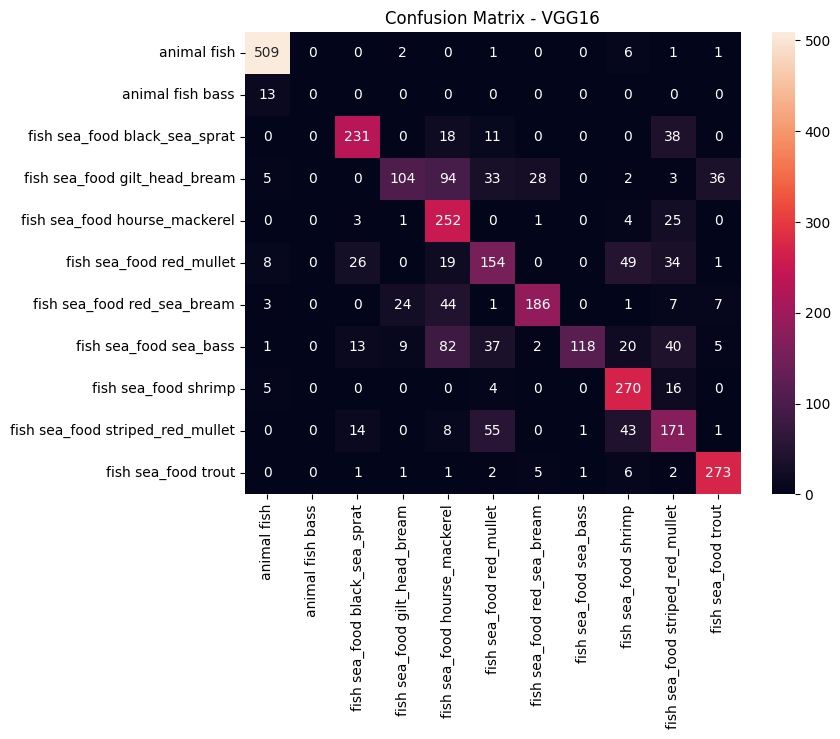

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.22      0.02      0.03       327
            fish sea_food shrimp       0.00      0.00      0.00       295
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.33      0.08      0.13       292

                        accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


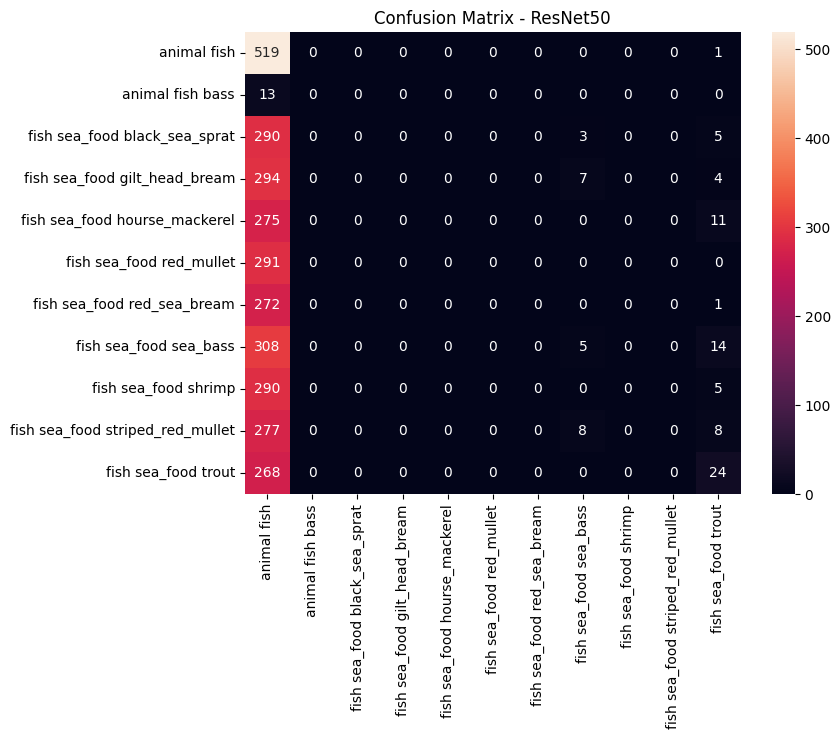

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step
Classification Report for MobileNetV2:
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.50      0.08      0.13        13
   fish sea_food black_sea_sprat       1.00      0.97      0.98       298
   fish sea_food gilt_head_bream       0.97      0.98      0.98       305
   fish sea_food hourse_mackerel       1.00      0.96      0.98       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       0.98      0.99      0.98       273
          fish sea_food sea_bass       0.98      0.99      0.99       327
            fish sea_food shrimp       1.00      0.99      0.99       295
fish sea_food striped_red_mullet       0.92      1.00      0.96       293
             fish sea_food trout       1.00      1.00      1.00       292

                        acc

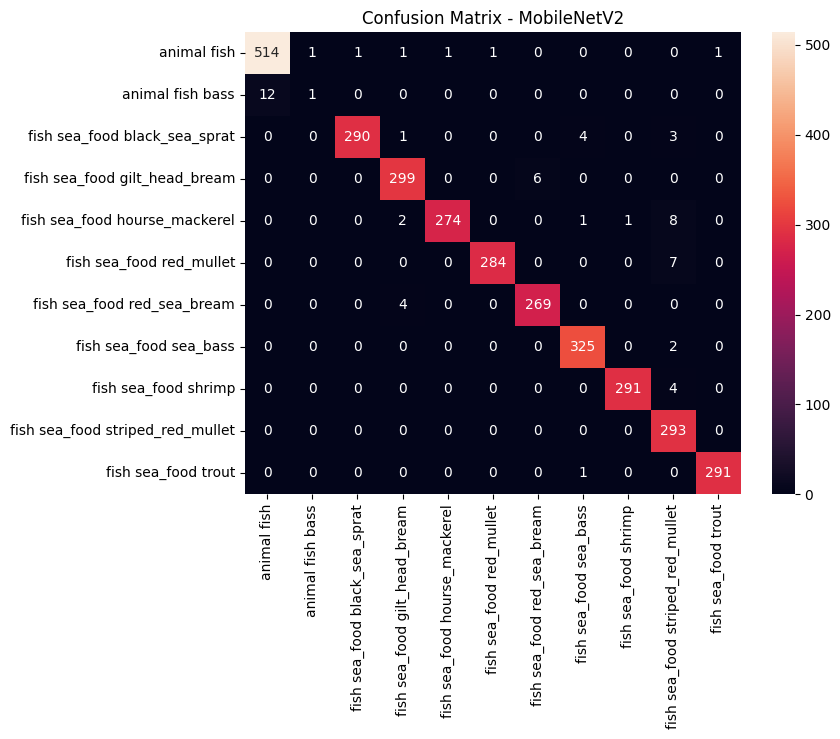

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.97      0.98      0.98       298
   fish sea_food gilt_head_bream       0.96      0.99      0.98       305
   fish sea_food hourse_mackerel       0.92      0.99      0.95       286
        fish sea_food red_mullet       0.98      0.97      0.97       291
     fish sea_food red_sea_bream       1.00      0.96      0.98       273
          fish sea_food sea_bass       0.96      0.94      0.95       327
            fish sea_food shrimp       1.00      1.00      1.00       295
fish sea_food striped_red_mullet       0.95      0.90      0.92       293
             fish sea_food trout       0.98      1.00      0.99       292

                        ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


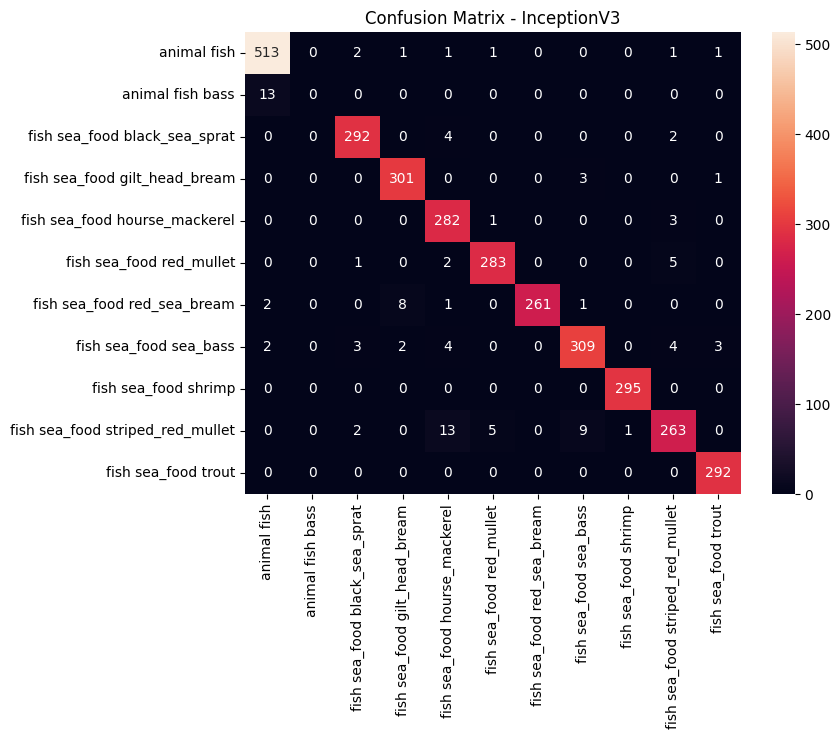

3193/3193 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       295
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


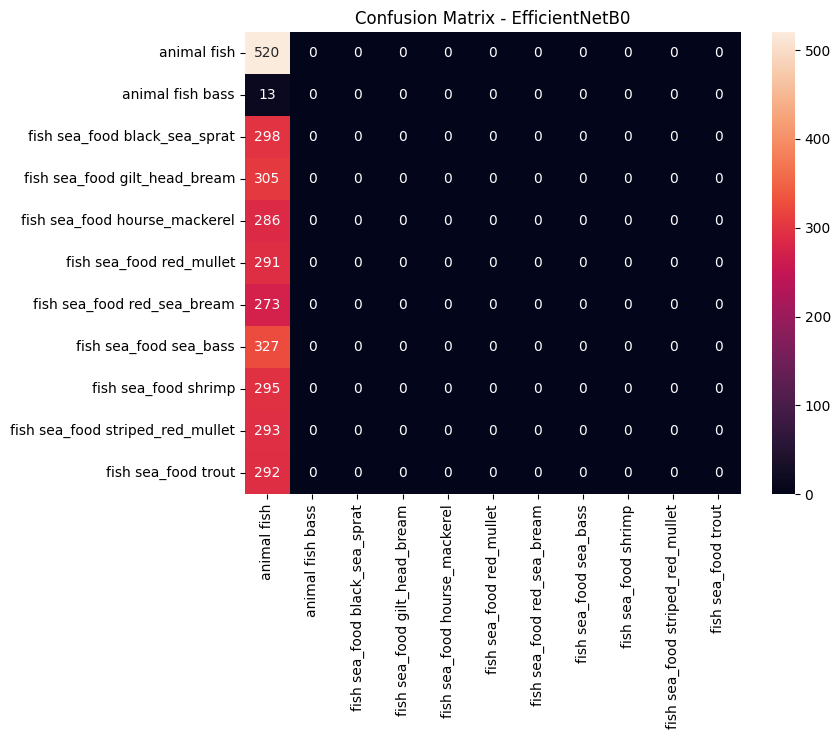

In [8]:

def evaluate_model(model_path, model_name):
    model = tf.keras.models.load_model(model_path)
    preds = model.predict(test_generator)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_generator.classes

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate all models
evaluate_model("cnn_fish_model.h5", "CNN")

for name in models_dict.keys():
    evaluate_model(f"{name}_fish_model.h5", name)


# Conclusion:
- The experiments demonstrated that transfer learning with modern lightweight models (especially MobileNetV2) is highly effective for fish species classification tasks. The trained MobileNetV2 model showed excellent accuracy and generalization on the dataset while maintaining a small computational footprint, making it ideal for deployment in mobile or embedded applications.

- Future work can explore further dataset expansion, fine-grained hyperparameter tuning, or quantization techniques to improve inference speed and reduce model size for edge devices.

